In [1]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import utils
import config
import re
import os

In [2]:
rc("svg", fonttype="none") 

In [3]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata["date_time"] = pd.to_datetime(metadata['Date_Collected'])
metadata["Sample_ID"] = metadata.index
# metadata = metadata.set_index("Patient_No", drop=False)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,date_time,Sample_ID
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781,2016-12-10,magic.0001
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038,2016-12-15,magic.0004
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636,2016-12-15,magic.0006
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,2016-12-15,magic.0007
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,2016-12-15,magic.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2021-08-22,magic.6595
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2021-09-06,magic.6597
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,2021-08-23,magic.6598


In [4]:
CAGs = pd.read_csv(os.path.join(config.CLEAN_DIR, "reduced_CAG_profiles_clean.tsv"), sep="\t", index_col=0)
CAG_richness = (CAGs > 0).sum(axis=1)
metadata["CAG Richness"] = CAG_richness

pathways = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_pathcoverage_clean.tsv"), sep="\t", index_col=0)

pathway_richness = (pathways > 0.75).sum(axis=1)
metadata["Pathway Richness"] = pathway_richness

df = pd.read_csv("../data/raw/species_rarefied.txt", sep="\t")
df = df.T
relative_abundances = df.div(df.sum(axis=1), axis=0)

species_richness = (relative_abundances > 0.00001).sum(axis=1)
shannon_diversity = -(relative_abundances * np.log(relative_abundances)).fillna(0).sum(axis=1)

# metadata = metadata[metadata["Sample_ID"].apply(lambda x : x in relative_abundances.index)]
metadata = metadata.loc[relative_abundances.index]

metadata["Species Richness"] = species_richness
metadata["Shannon Diversity"] = shannon_diversity

metadata

/Users/daniel/opt/anaconda3/envs/gmwi2_analysis/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,Sequencing_Project,Filename,Extraction,depth,date_time,Sample_ID,CAG Richness,Pathway Richness,Species Richness,Shannon Diversity
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,2016-12-15,magic.0007,146,36,243,2.248965
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,2016-12-15,magic.0008,129,39,160,1.548390
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673,2016-12-10,magic.0010,126,40,150,0.932723
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772,2016-12-22,magic.0012,152,40,304,1.928827
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610,2016-12-22,magic.0014,150,31,209,1.177484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,2021-08-22,magic.6595,119,64,873,3.794591
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,2021-09-06,magic.6597,73,52,757,4.276521
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,2021-08-23,magic.6598,112,67,789,3.873291
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641,2021-07-21,magic.6599,92,52,1059,4.765721


In [5]:
gene_richness = pd.read_csv("../data/clean/rarified_gene_richness.tsv", sep="\t", index_col=0)
metadata["Gene Richness"] = gene_richness.loc[metadata.index]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,Filename,Extraction,depth,date_time,Sample_ID,CAG Richness,Pathway Richness,Species Richness,Shannon Diversity,Gene Richness
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,magic.0007.S155.001.fa,PowerSoil,6825017,2016-12-15,magic.0007,146,36,243,2.248965,89717.0
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,X8.S125.001.fa,PowerSoil,2928044,2016-12-15,magic.0008,129,39,160,1.548390,61474.0
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,magic.0010.S167.001.fa,PowerSoil,7251673,2016-12-10,magic.0010,126,40,150,0.932723,62169.0
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,magic.0012.S177.001.fa,PowerSoil,8106772,2016-12-22,magic.0012,152,40,304,1.928827,95076.0
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,magic.0014.S1.001.fa,PowerSoil,15346610,2016-12-22,magic.0014,150,31,209,1.177484,74356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,magic.6595.S253.001.fa,PowerSoilPro,1562968,2021-08-22,magic.6595,119,64,873,3.794591,185364.0
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,magic.6597.S265.001.fa,PowerSoilPro,2113880,2021-09-06,magic.6597,73,52,757,4.276521,176493.0
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,magic.6598.S277.001.fa,PowerSoilPro,1650388,2021-08-23,magic.6598,112,67,789,3.873291,142285.0
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,magic.6599.S288.001.fa,PowerSoilPro,1519641,2021-07-21,magic.6599,92,52,1059,4.765721,155385.0


In [6]:
metadata = metadata.set_index("Patient_No", drop=False)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,Filename,Extraction,depth,date_time,Sample_ID,CAG Richness,Pathway Richness,Species Richness,Shannon Diversity,Gene Richness
Patient_No,,,,,,,,,,,,,,,,,,,,,
105,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,magic.0007.S155.001.fa,PowerSoil,6825017,2016-12-15,magic.0007,146,36,243,2.248965,89717.0
105,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,X8.S125.001.fa,PowerSoil,2928044,2016-12-15,magic.0008,129,39,160,1.548390,61474.0
101,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,magic.0010.S167.001.fa,PowerSoil,7251673,2016-12-10,magic.0010,126,40,150,0.932723,62169.0
105,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,magic.0012.S177.001.fa,PowerSoil,8106772,2016-12-22,magic.0012,152,40,304,1.928827,95076.0
106,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,magic.0014.S1.001.fa,PowerSoil,15346610,2016-12-22,magic.0014,150,31,209,1.177484,74356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,magic.6595.S253.001.fa,PowerSoilPro,1562968,2021-08-22,magic.6595,119,64,873,3.794591,185364.0
595,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,magic.6597.S265.001.fa,PowerSoilPro,2113880,2021-09-06,magic.6597,73,52,757,4.276521,176493.0
585,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,magic.6598.S277.001.fa,PowerSoilPro,1650388,2021-08-23,magic.6598,112,67,789,3.873291,142285.0


In [7]:
abx = pd.read_csv(os.path.join(config.RAW_DIR, "MAGIC_outpatientCHOP_antimicrob_041223.xlsx - anti-infOPT_deid.tsv"), sep="\t", index_col=1)
abx = abx.drop(["SIG", "MED_NAME"], axis=1)
abx["START_DATE"] = pd.to_datetime(abx["START_DATE"])
abx = abx[~abx["START_DATE"].isna()]
abx

,REDCAP_PARTICIPANT_ID,SIMPLE_GENERIC_NAME,ORDERING_DATE_FMT,START_DATE,END_DATE,DURATION_DAYS,REFILLS,ORDER_CLASS,ORDERING_MODE,THERA_CLASS,PHARM_SUBCLASS,PHARM_CLASS,ROUTE,DOSE,days_sig
PARTICIPANT_STUDY_ID,,,,,,,,,,,,,,,
101,1,Amoxicillin-Pot Clavulanate,2/9/2018,2018-02-09,2/19/2018,10.0,0,Print,Outpatient,Anti-Infective Agents,Penicillin Combinations,Penicillins,Oral,90 mg AMOX/kg/24 hrs 2 TIMES DAILY,10 days.
102,13,Oseltamivir Phosphate,2/22/2017,2017-02-22,2/28/2017,6.0,0,Print,Outpatient,Anti-Infective Agents,Influenza Agents,Antiviral,Oral,3 mg/kg/DOSE 2 TIMES DAILY,5 days.
102,13,Amoxicillin,1/18/2018,2018-01-18,1/28/2018,10.0,0,E-Prescribe,Outpatient,Anti-Infective Agents,Aminopenicillins,Penicillins,Oral,40 mg/kg/24 hrs 2 TIMES DAILY,10 days.
108,49,Cephalexin,5/8/2018,2018-05-08,5/18/2018,10.0,0,E-Prescribe,Outpatient,Anti-Infective Agents,Cephalosporins - 1st Generation,Cephalosporins,Oral,7 mL 3 TIMES DAILY,10 days.
108,49,Amoxicillin,8/24/2018,2018-08-24,9/3/2018,10.0,0,E-Prescribe,Outpatient,Anti-Infective Agents,Aminopenicillins,Penicillins,Oral,6 mL 2 TIMES DAILY,10 days.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1054,Cefdinir,11/6/2020,2020-11-06,11/16/2020,10.0,0,E-Prescribe,Outpatient,Anti-Infective Agents,Cephalosporins - 3rd Generation,Cephalosporins,Oral,14 mg/kg/24 hrs DAILY,10 days.
594,1054,Cefdinir,4/19/2021,2021-04-19,4/29/2021,10.0,0,E-Prescribe,Outpatient,Anti-Infective Agents,Cephalosporins - 3rd Generation,Cephalosporins,Oral,14 mg/kg/24 hrs DAILY,10 days.
594,1054,Cefdinir,6/3/2021,2021-06-03,6/13/2021,10.0,0,E-Prescribe,Outpatient,Anti-Infective Agents,Cephalosporins - 3rd Generation,Cephalosporins,Oral,14 mg/kg/24 hrs DAILY,10 days.


In [41]:
np.unique(abx["PHARM_CLASS"], return_counts=True)

(array(['Anthelmintic', 'Antifungals', 'Antimalarial', 'Antiviral',
        'Cephalosporins', 'Fluoroquinolones', 'Macrolide antibiotics',
        'Misc. antiinfectives', 'Penicillins'], dtype=object),
 array([  1,   3,   1,  27,  51,   1,   5,  12, 310]))

In [8]:
metadata["Timeline_Weeks2"] = [row["Timeline_Weeks"] if row["Timeline_Weeks"] not in ["na", np.nan] else (
    str(round(row["calc_age_mo"] / 4))
)
                               for idx, row in metadata.iterrows()]

# force weeks 5 and 6 to week 4
metadata["Timeline_Weeks2"] = metadata["Timeline_Weeks2"].apply(lambda x : x if x not in ["5", "6"] else "4")

metadata["Timeline_Weeks2"].unique()

array(['0', '1', '2', '3', '4', '12', '24', '36', '48', '60', '72', '84',
       '96'], dtype=object)

In [52]:
from scipy.stats import zscore

metadata["Gene Richness Z"] = metadata.groupby(['Timeline_Weeks2'])["Gene Richness"].transform(lambda x : zscore(x, ddof=1))
metadata["Shannon Diversity Z"] = metadata.groupby(['Timeline_Weeks2'])["Shannon Diversity"].transform(lambda x : zscore(x, ddof=1))
metadata["Species Richness Z"] = metadata.groupby(['Timeline_Weeks2'])["Species Richness"].transform(lambda x : zscore(x, ddof=1))
metadata["Pathway Richness Z"] = metadata.groupby(['Timeline_Weeks2'])["Pathway Richness"].transform(lambda x : zscore(x, ddof=1))
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,CAG Richness,Pathway Richness,Species Richness,Shannon Diversity,Gene Richness,Timeline_Weeks2,Gene Richness Z,Shannon Diversity Z,Species Richness Z,Pathway Richness Z
Patient_No,,,,,,,,,,,,,,,,,,,,,
105,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,146,36,243,2.248965,89717.0,0,1.108357,0.586133,-0.177661,0.498084
105,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,129,39,160,1.548390,61474.0,0,0.212417,-0.346848,-0.908978,0.737227
101,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,126,40,150,0.932723,62169.0,0,0.234464,-1.166754,-0.997089,0.816941
105,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,152,40,304,1.928827,95076.0,1,1.135154,-0.098421,-0.045055,0.216732
106,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,150,31,209,1.177484,74356.0,1,0.423452,-1.163035,-0.898896,-0.532004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,119,64,873,3.794591,185364.0,96,1.326129,0.051825,1.148553,1.241744
595,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,73,52,757,4.276521,176493.0,96,1.083276,1.150159,0.130249,-0.270783
585,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,112,67,789,3.873291,142285.0,96,0.146792,0.231187,0.411161,1.619876


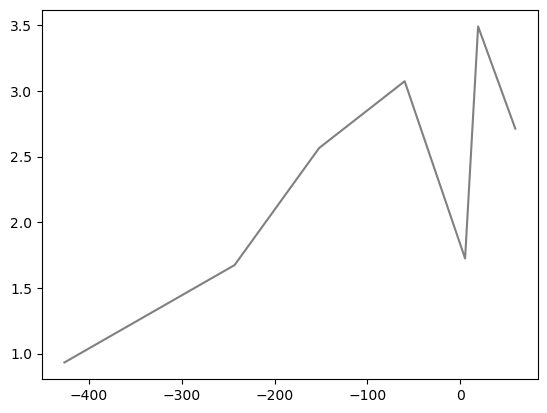

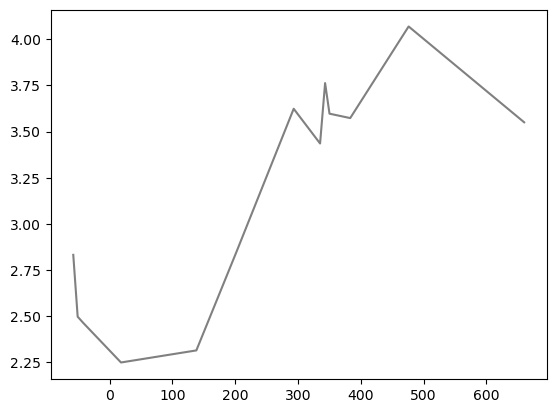

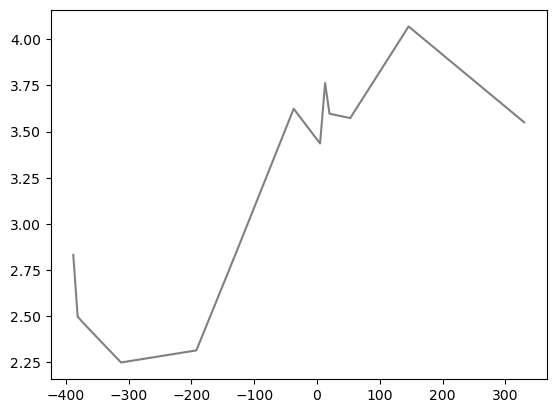

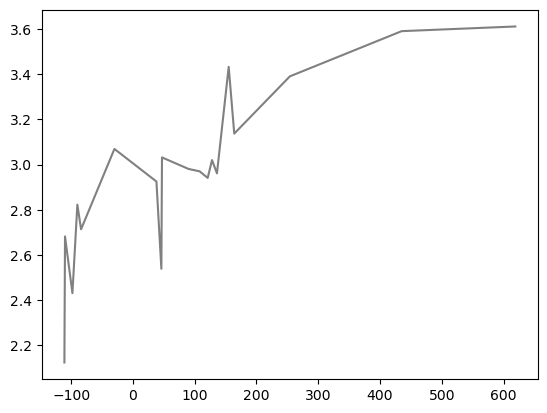

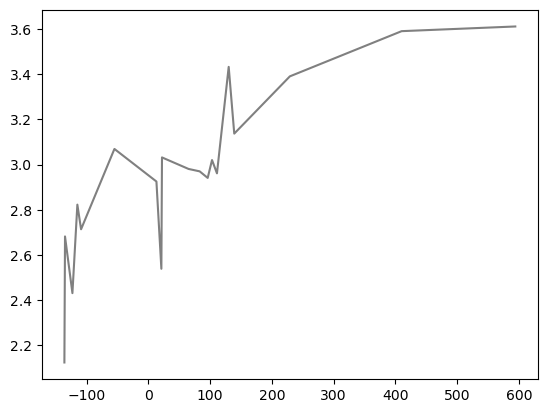

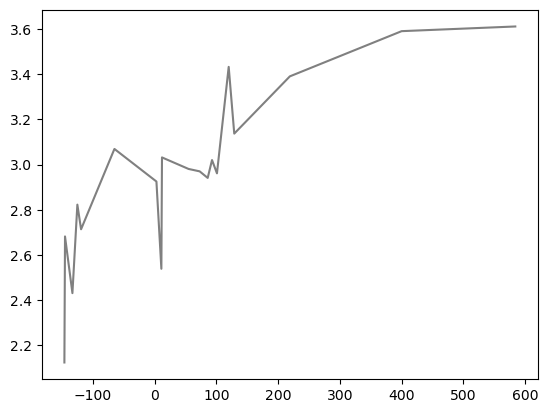

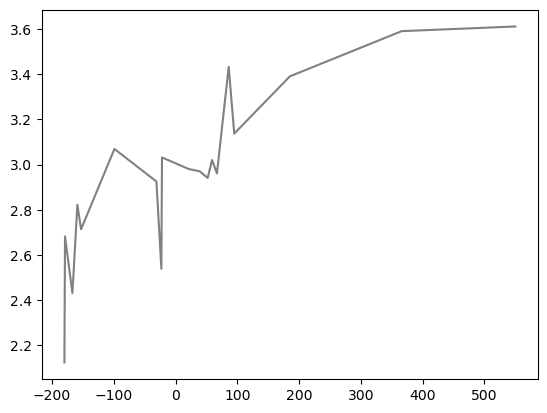

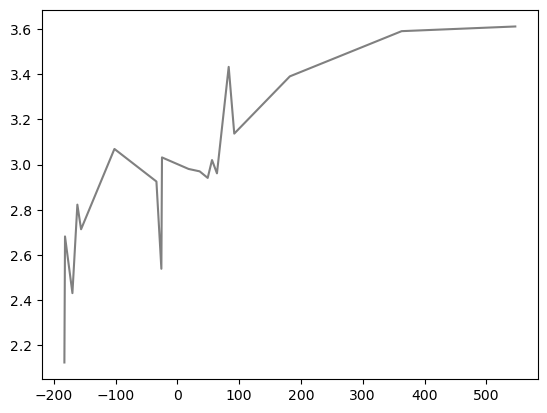

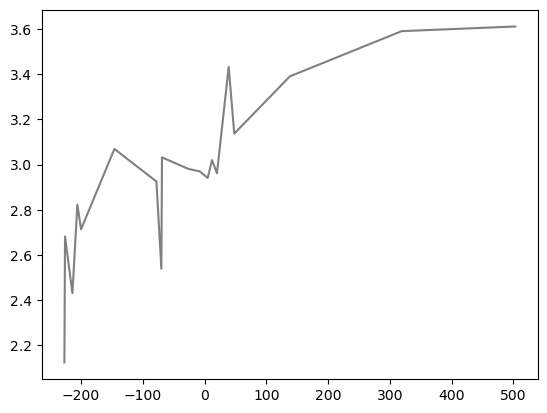

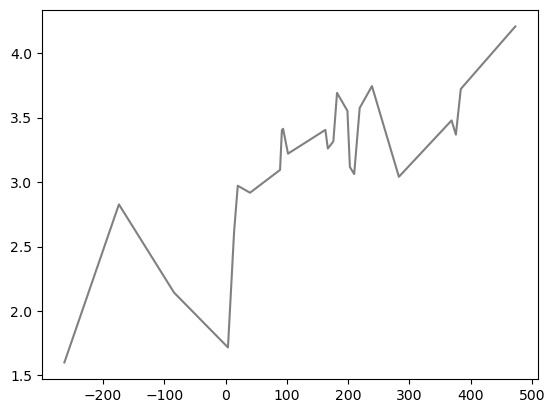

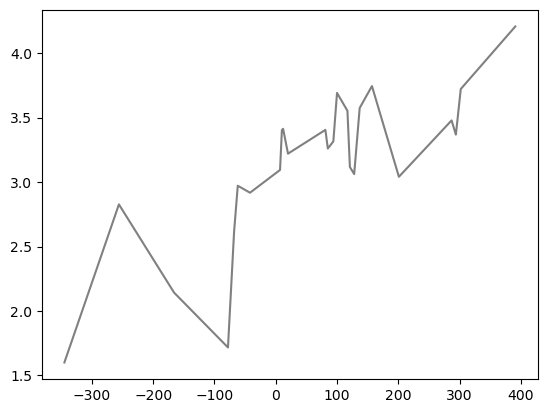

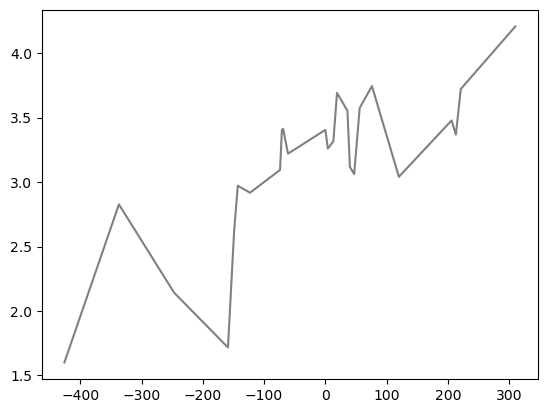

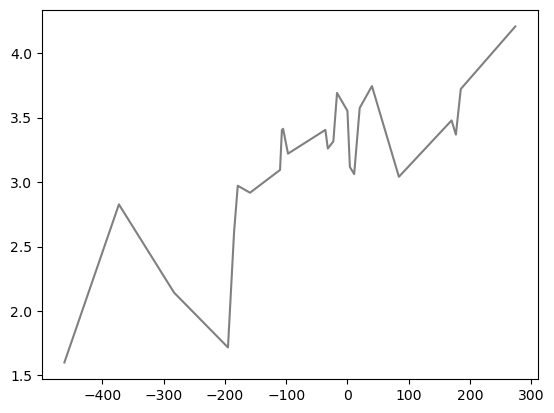

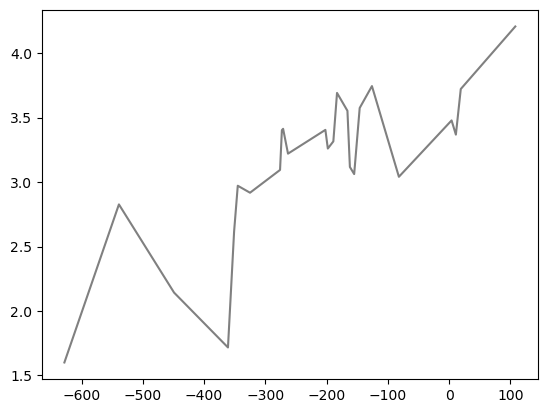

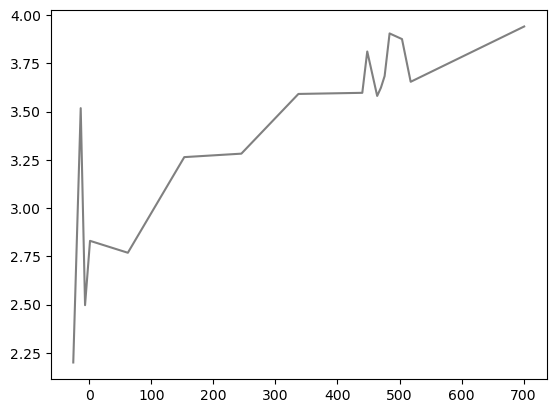

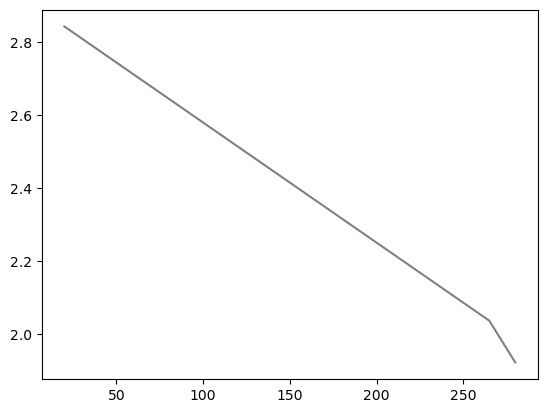

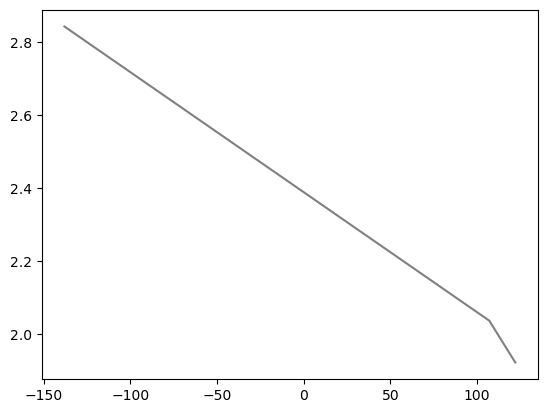

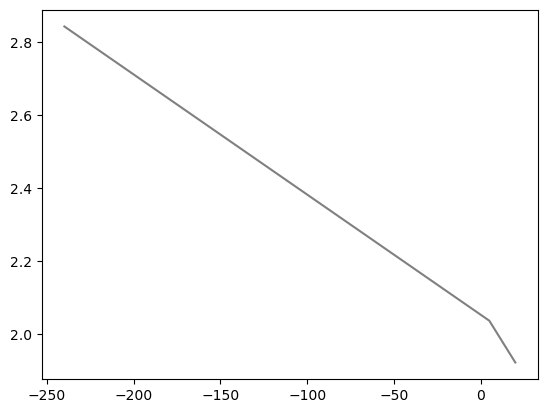

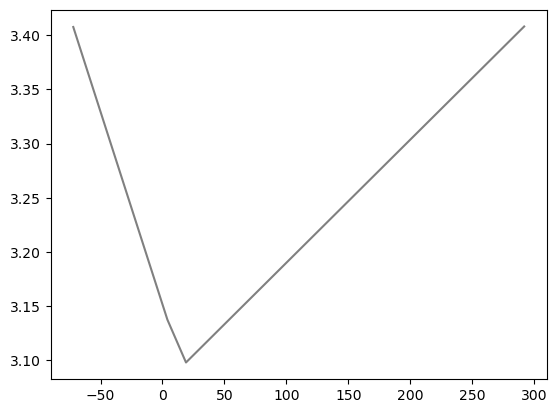

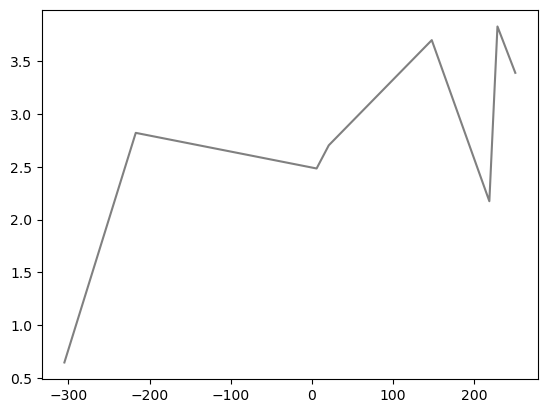

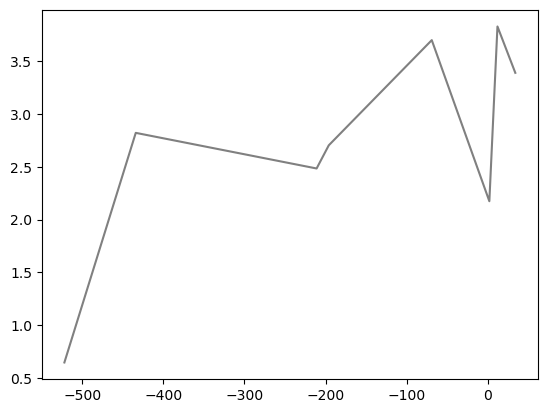

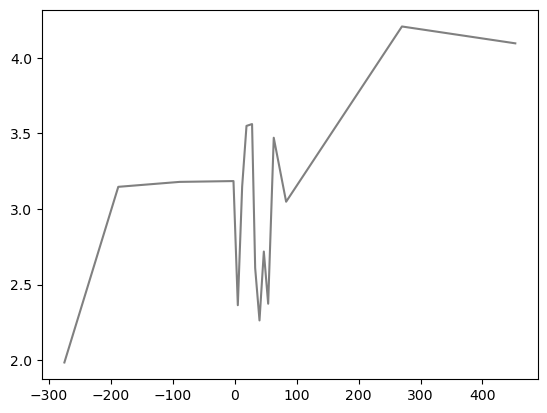

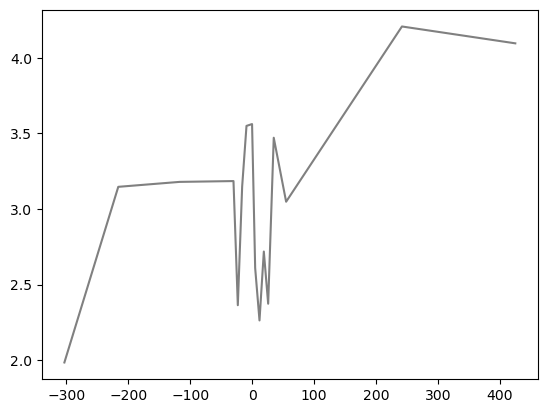

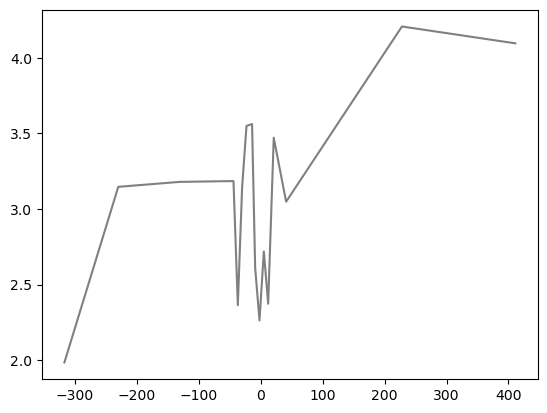

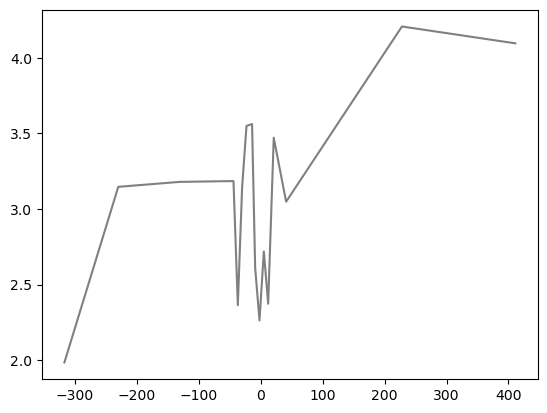

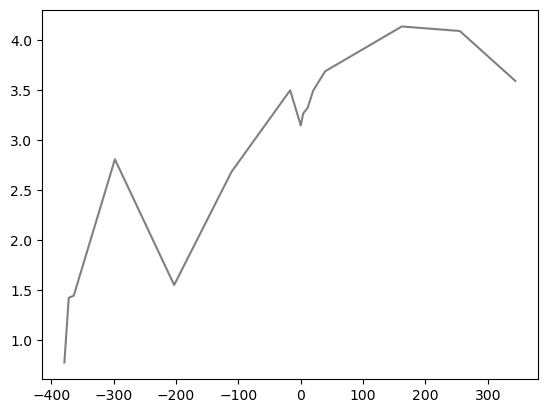

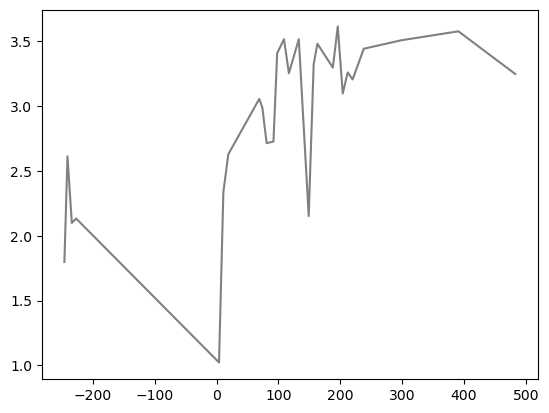

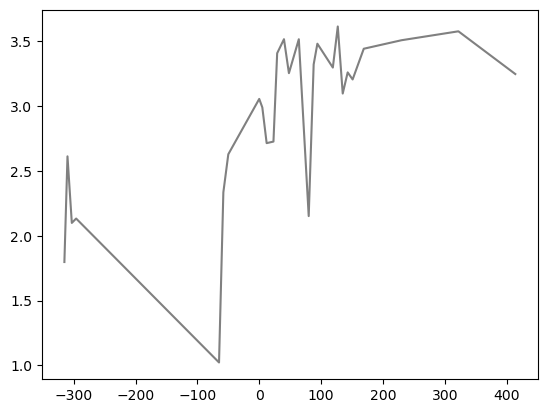

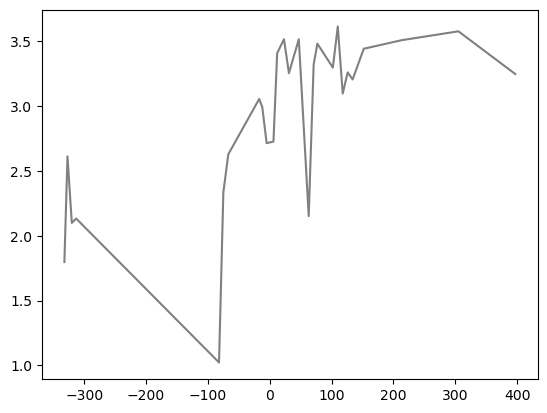

KeyboardInterrupt: Interrupted by user

In [41]:

for i in range(abx.shape[0]):
    participant = abx.index[i]
    start_date = abx.iloc[i]["START_DATE"]
    
    # get a radius around the abx start date
    if participant not in metadata.index: continue
        
    part_df = metadata.loc[participant] 
    if len(part_df.shape) < 2: continue
        
#     part_df = part_df[(part_df["calc_age_mo"] >= 0) & (part_df["calc_age_mo"] <= 8)]
    
    part_df = part_df[~part_df["date_time"].isna()]
    part_df = part_df.sort_values("date_time")
    
    if part_df.shape[0] < 2: continue
        
    radius = 30
#     plot_info = part_df["date_time"].apply(lambda x : abx((x - start_date).days) < radius)
    plot_info = part_df["date_time"].apply(lambda x : (x - start_date).days)
#     do_plot = part_df["date_time"].apply(lambda x : abs((x - start_date).days) < radius)

    do_plot = part_df["date_time"].apply(lambda x : True)
    
    if do_plot.sum() < 2: continue
    
    index = "Gene Richness"
    
    plt.figure()
    plt.plot(plot_info[do_plot], part_df[do_plot][index], color="gray")
    plt.show()
    input()

<Figure size 640x480 with 0 Axes>

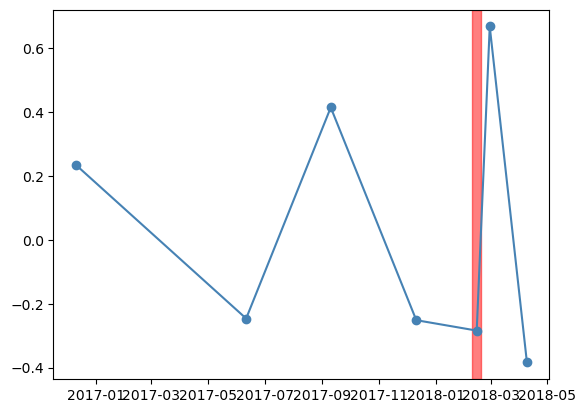

<Figure size 640x480 with 0 Axes>

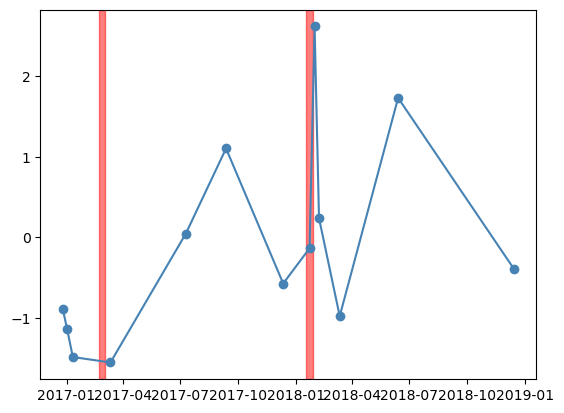

<Figure size 640x480 with 0 Axes>

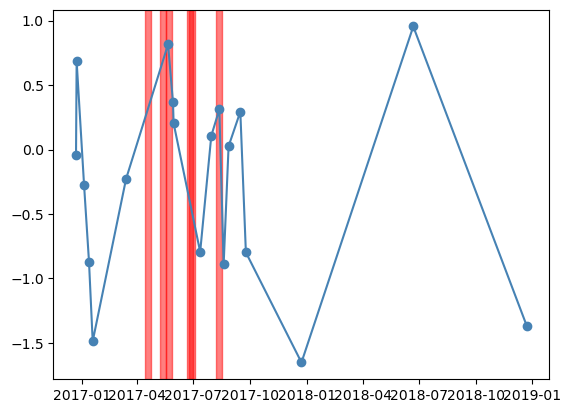

KeyboardInterrupt: Interrupted by user

In [10]:
participants = metadata.index.unique()
for p in participants:
    if p not in abx.index: continue
    plt.figure()
    metadata_red = metadata.loc[[p]]
    metadata_red = metadata_red[~metadata_red["date_time"].isna()]
    metadata_red = metadata_red.sort_values("date_time")
    index = "Gene Richness Z"
    
    abx_df = abx.loc[[p]]
    
    c = "steelblue" if metadata_red.iloc[0]["expo_cat1"] == "No antibiotics" else 'orange'
    
    plt.figure()
    
    x_values = metadata_red["date_time"]
    
    plt.plot(x_values, metadata_red[index], c=c, marker="o")
    
    for start_date in abx_df["START_DATE"]:
        plt.axvspan(start_date, start_date + pd.DateOffset(10), alpha=0.5, color='red')
    
    plt.show()
    
        
    
    input()

In [50]:
metadata = metadata[~metadata["date_time"].isna()]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,Sample_ID,CAG Richness,Pathway Richness,Species Richness,Shannon Diversity,Gene Richness,Timeline_Weeks2,Gene Richness Z,Shannon Diversity Z,Species Richness Z
Patient_No,,,,,,,,,,,,,,,,,,,,,
105,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,magic.0007,146,36,243,2.248965,89717.0,0,1.108357,0.586133,-0.177661
105,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,magic.0008,129,39,160,1.548390,61474.0,0,0.212417,-0.346848,-0.908978
101,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,magic.0010,126,40,150,0.932723,62169.0,0,0.234464,-1.166754,-0.997089
105,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,magic.0012,152,40,304,1.928827,95076.0,1,1.135154,-0.098421,-0.045055
106,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,magic.0014,150,31,209,1.177484,74356.0,1,0.423452,-1.163035,-0.898896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,magic.6595,119,64,873,3.794591,185364.0,96,1.326129,0.051825,1.148553
595,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,magic.6597,73,52,757,4.276521,176493.0,96,1.083276,1.150159,0.130249
585,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,magic.6598,112,67,789,3.873291,142285.0,96,0.146792,0.231187,0.411161


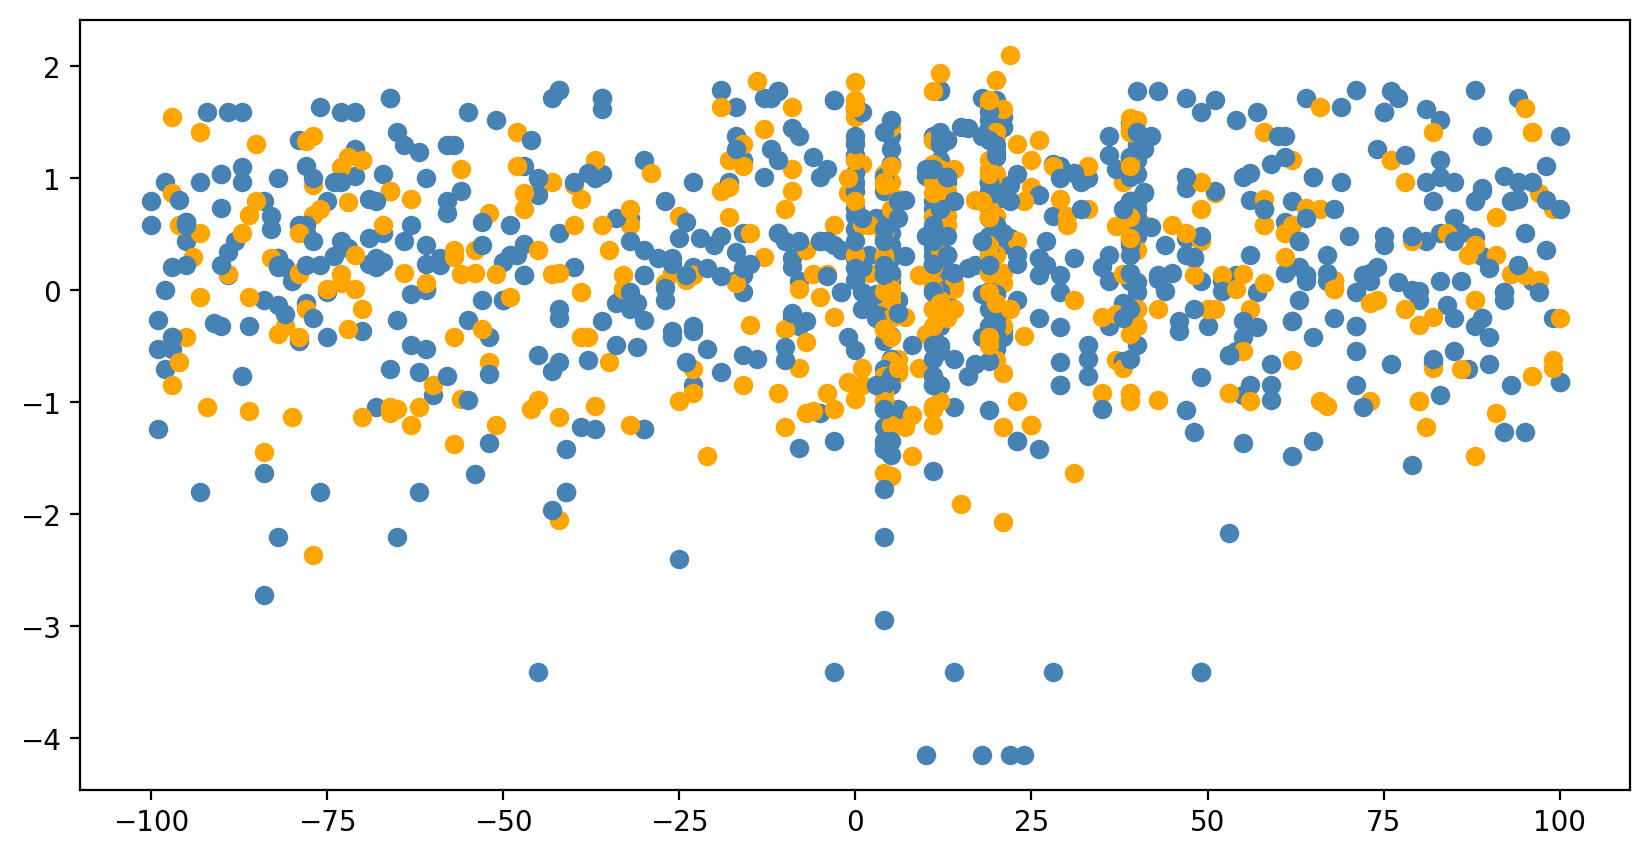

In [53]:
plt.figure(figsize=(10, 5), dpi=200)
for idx, row in abx[abx["PHARM_CLASS"] == "Penicillins"].iterrows():
    part = idx
    if part not in metadata.index: continue
        
        
    start = row["START_DATE"]
    
    part_meta = metadata.loc[[part]].copy().sort_values("date_time")
    
    part_meta["days_from_abx"] = part_meta["date_time"].apply(lambda x : (x - start).days)
    
    part_meta = part_meta[part_meta["days_from_abx"].apply(lambda x : abs(x) <= 100)]
    
    index = "Pathway Richness Z"
    
    c = "steelblue" if metadata.loc[[part]].iloc[0]["expo_cat1"] == "No antibiotics" else "orange"
    
    plt.scatter(part_meta["days_from_abx"], part_meta[index], c=c)